In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv("Train_Data.csv")

In [ ]:
test_data = pd.read_csv("Test_Data.csv")

In [ ]:
test_data.isna().sum()

,0
SEQN,2
RIDAGEYR,3
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [ ]:
df.head()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,32.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
df.shape

(1966, 10)

In [ ]:
df.isna().sum()

,0
SEQN,12
RIDAGEYR,9
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [ ]:
test_data.shape

(312, 9)

In [ ]:
test_data.head()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,34.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,12.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,56.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,20.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,64.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [ ]:
df.drop("SEQN",axis=1,inplace=True)

In [ ]:
df.head()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,32.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [ ]:
df.dropna().shape

(1843, 9)

In [ ]:
df_dropped_na = df.dropna()

In [ ]:
df_dropped_na.isna().sum()

,0
RIDAGEYR,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0
age_group,0


In [ ]:
df_dropped_na.iloc[:,:-1] = StandardScaler().fit_transform(df_dropped_na.iloc[:,:-1])
df_dropped_na.iloc[:,-1] = LabelEncoder().fit_transform(df_dropped_na.iloc[:,-1])

<Axes: >

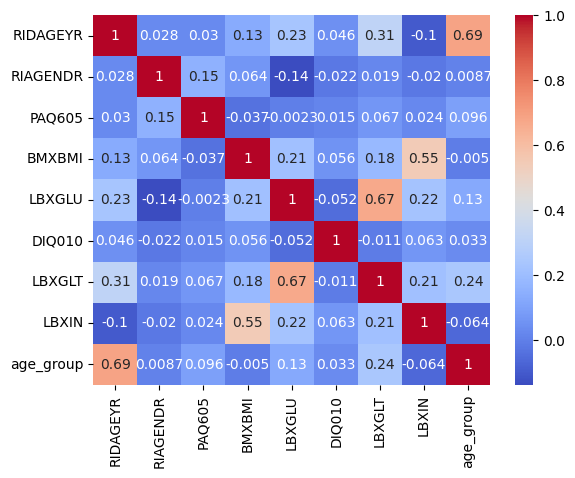

In [ ]:
sns.heatmap(df_dropped_na.corr(),cmap="coolwarm",annot=True)

In [ ]:
columns = ["RIDAGEYR","LBXGLU","LBXGLT"]

In [ ]:
X = df_dropped_na.loc[:,columns]
y = df_dropped_na["age_group"]

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lr = LogisticRegression(penalty="l2")
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

[[463   0]
 [  4  86]]
0.9927667269439421
0.9772727272727273


In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1_score(y_test,y_pred)

0.9257142857142857

In [ ]:
support = SVC()
param = {
    "C":[0.1,0.2,0.5,1,1.5,2,2.5,3,3.5,4,4.5],
    "kernel":["linear","rbf","poly"],
    "gamma":["scale","auto"]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(support,param,cv=5,scoring="f1")
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='f1')

In [ ]:
grid.best_score_

np.float64(0.9976470588235294)

In [ ]:
model = grid.best_estimator_

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
forest = RandomForestClassifier()
param = {
    "n_estimators":[100,200,300,50,150],
    "criterion":["gini","entropy"],
    "max_depth":[2,3,5,10,20,15,25,30],
    "min_samples_leaf":[10,20,30,100,200,300,500,600,700,800,900]
}
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(forest,param,cv=5,scoring="f1")
grid.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20, 15, 25,
                                                      30],
                                        'min_samples_leaf': [10, 20, 30, 100,
                                                             200, 300, 500, 600,
                                                             700, 800, 900],
                                        'n_estimators': [100, 200, 300, 50,
                                                         150]},
                   scoring='f1')

In [ ]:
grid.best_score_

np.float64(1.0)

In [ ]:
new_model = grid.best_estimator_

In [ ]:
test_data.head()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,34.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,12.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,56.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,20.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,64.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [ ]:
test_data.isna().sum()

,0
SEQN,2
RIDAGEYR,3
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [ ]:
test_data_refined = test_data.loc[:,columns]

In [ ]:
test_data_refined.isna().sum()

,0
RIDAGEYR,3
LBXGLU,1
LBXGLT,2


In [ ]:
test_data_refined.fillna(test_data_refined.mean(),inplace=True)

In [ ]:
test_data_refined.isna().sum()

,0
RIDAGEYR,0
LBXGLU,0
LBXGLT,0


In [ ]:
test_data_refined = scaler.transform(test_data_refined)

In [ ]:
test_data_refined

array([[ 33.84033641,  89.79104517, 130.54448048],
       [ 11.94791426,  93.53259463, 136.34680526],
       [ 55.73275855, 100.08030619, 131.51153461],
       [ 19.90879504,  86.98488308, 107.3351814 ],
       [ 63.69363933,  85.11410834, 101.53285663],
       [ 42.79632728,  84.17872098, 122.80804746],
       [ 46.77676767,  91.6618199 , 177.93013277],
       [ 39.81099699,  82.30794625, 160.52315846],
       [ 13.93813446,  84.17872098, 117.00572269],
       [ 16.92346475,  92.59720727,  92.82936948],
       [ 73.64474031,  93.53259463, 115.07161443],
       [ 29.85989602,  96.33875673, 115.07161443],
       [ 12.94302436,  91.6618199 ,  73.48828691],
       [ 47.77187777,  97.2741441 , 116.03866856],
       [ 75.6349605 , 101.01569356, 197.27121534],
       [ 79.61540089,  90.72643254, 110.4703085 ],
       [ 60.70830904, 139.36657555, 239.82159699],
       [ 52.74742826, 100.08030619, 129.57742636],
       [ 28.86478592,  81.37255888,  64.78479976],
       [ 35.8305566 ,  92.59720

In [ ]:
new_model.score(X_test,y_test)

1.0

In [ ]:
new_model

,count
0,
1,312


In [ ]:
encoder.classes_

array([0, 1], dtype=object)

In [ ]:
z.columns = ["age_group"]

In [ ]:
z.to_csv("result1.csv")

<Axes: xlabel='count', ylabel='age_group'>

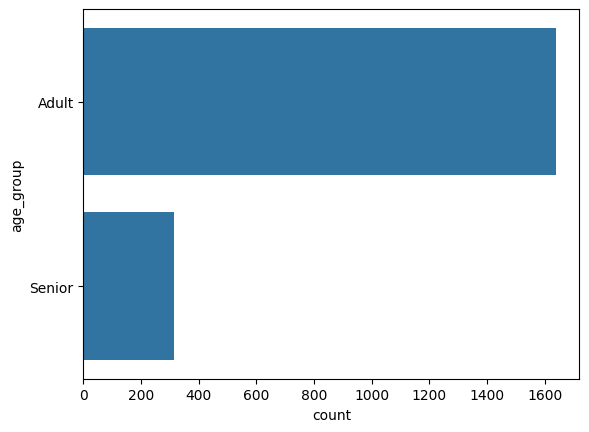

In [ ]:
df1 = pd.read_csv("Train_Data.csv")
sns.countplot(df1.iloc[:,-1])